# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](./readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

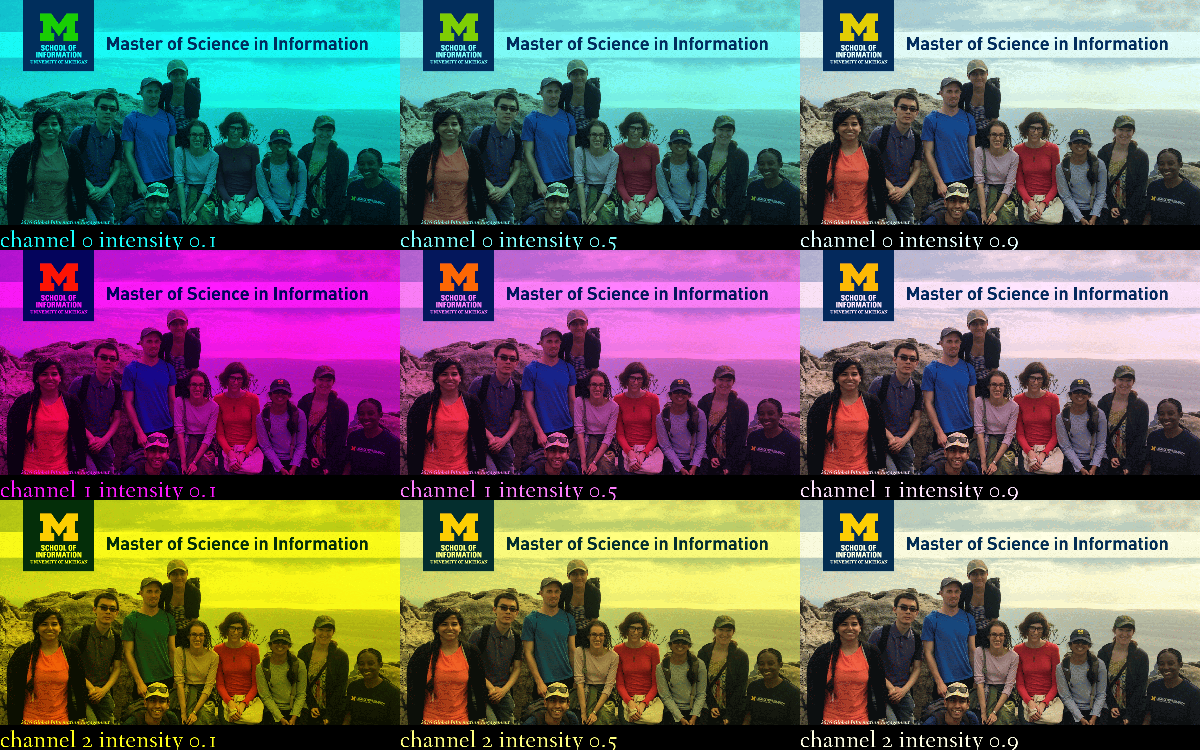

In [3]:
import PIL
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageEnhance
import numpy as np

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
# draw = ImageDraw.Draw(image)
# font = ImageFont.truetype('readonly/fanwood-webfont.ttf', 40)
# txt = draw.text((0, 430),"Draw This Text",(255,255,255),font=font)

# function to get wanted intensity multiplayer
def intensity(m):
    if m == 1:
        return 0.1
    else:
        return (m + 0.4)


# this function creates a numpy array.
# for example (0.1, 1 ,1) gets in as (r, g , b)
# and returns an image with applied values
def img(r, g, b):
    arr = np.array(image, dtype=float)
    arr[:,:,0] *= r
    arr[:,:,1] *= g
    arr[:,:,2] *= b
    
    return Image.fromarray(arr.astype(np.uint8))


# default values
images=[]
x,y,z = 1,1,1

# using the above tuple (x, y, z) = (1, 1, 1) we want to  
# create the list [(x, y, z), (x, y, z)....(x, y, z)] nine in total 
# at each iteration of the loop we use the func img(x,y,z) to actually create 
# image based on a given tuple
for i in range(1, 10):
    # first 3 images will have only their red band changed, 
    # all others values will stay the same as the original image
    if i <= 3:
        x = intensity(x)
    # second three images will have their green band changed,
    # and again all other values will remain the same as original
    # and will reset x = 1 as original
    elif i <= 6:
        x = 1
        y = intensity(y)
    # you already know what we are doing here    
    else:
        y = 1
        z = intensity(z)    
    images.append(img(x, y, z))     

# create a contact sheet 
first_image=images[0]
first_image = first_image.resize((int(first_image.width),int(first_image.height + 50) ))

contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# getting contact_sheet ready for draw
draw = ImageDraw.Draw(contact_sheet)
font = ImageFont.truetype('readonly/fanwood-webfont.ttf', 50)
    
def draw_txt(w, h, channel, intensity, rgb ):
    draw.text((w, h),"channel {} intensity {}".format(channel, intensity), rgb, font=font)
    
    
# initial values
channel = 0
intensity = 0.1
# width & height - this will be our starting point
w = 0
h = 460
# draws directly on the contact_sheet itself
for i in range(1, 10):
    if i <= 3:
        draw_txt(w, h, channel, intensity, (int(255*intensity), 255, 255))                        
        w+=800
        intensity+=0.4
        if i == 3:
            w = 0
            intensity = 0.1
            h+=500
            channel+=1
    elif i <= 6:
        draw_txt(w, h, channel, intensity, (255*intensity, int(255*intensity), 255))
        w+=800
        intensity+=0.4
        if i == 6:
            w = 0
            h += 500
            intensity = 0.1
            channel+=1
    else:
        txt = draw.text((w, h),"channel {} intensity {}".format(channel, intensity), (255, 255, int(255*intensity)), font=font)
        w+=800
        intensity+=0.4
        
# txt = draw.text((0, 460),"channel 0 intensity 0.1",(int(255*0.1),255,255),font=font)
# txt = draw.text((800, 460),"channel 0 intensity 0.5",(int(255*0.5),255,255),font=font)
# txt = draw.text((1600, 460),"channel 0 intensity 0.9",(int(255*0.9),255,255),font=font)
# txt = draw.text((0, 960),"channel 1 intensity 0.1",(255,int(255*0.1),255),font=font)
# txt = draw.text((800, 960),"channel 1 intensity 0.5",(255,int(255*0.5),255),font=font)
# txt = draw.text((1600, 960),"channel 1 intensity 0.9",(255,int(255*0.9),255),font=font)
# txt = draw.text((0, 960 + 500),"channel 2 intensity 0.1",(255,255,int(255*0.1)),font=font)
# txt = draw.text((800, 960 + 500),"channel 2 intensity 0.5",(255,255,int(255*0.5)),font=font)
# txt = draw.text((1600, 960 + 500),"channel 2 intensity 0.9",(255,255,int(255*0.9)),font=font)

x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
        
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)






In [ ]:
help(PIL.ImageFont)

## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.